In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams

In [ ]:
corpus = [
    "I love natural language processing",
    "Skip-gram is a word embedding model",
    "Word embeddings capture semantic information",
]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word2idx = tokenizer.word_index
idx2word = {v: k for k, v in word2idx.items()}
sequences = tokenizer.texts_to_sequences(corpus)

In [ ]:
skip_grams = []
for sequence in sequences:
    pairs, _ = skipgrams(sequence, vocabulary_size=len(word2idx), window_size=1
                         , negative_samples=0)
    skip_grams.extend(pairs)

In [ ]:
embedding_dim = 50

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word2idx) + 1,
                              output_dim=embedding_dim),
    tf.keras.layers.Dense(units=len(word2idx) + 1, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X = np.array([pair[0] for pair in skip_grams], dtype=np.int32)
y = np.array([pair[1] for pair in skip_grams], dtype=np.int32)

In [ ]:
y_one_hot = tf.one_hot(y, depth=len(word2idx) + 1)

history = model.fit(X, y_one_hot, epochs=100, batch_size=64)

In [ ]:
loss, accuracy = model.evaluate(X,y_one_hot)
print(f'Test Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 295ms/step - loss: 1.8985 - accuracy: 0.5714
Test Loss: 1.8985
Accuracy: 0.5714


Text(0, 0.5, 'Accuracy')

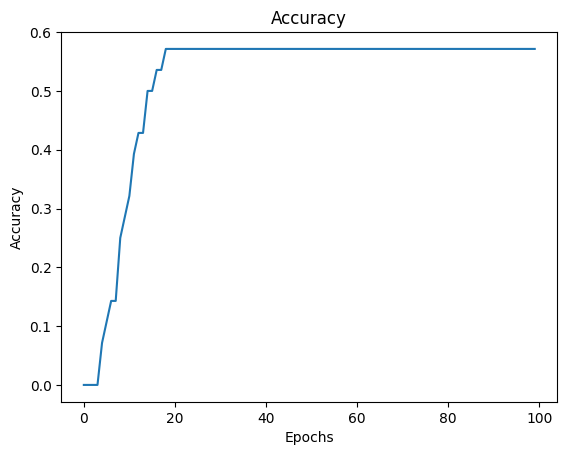

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

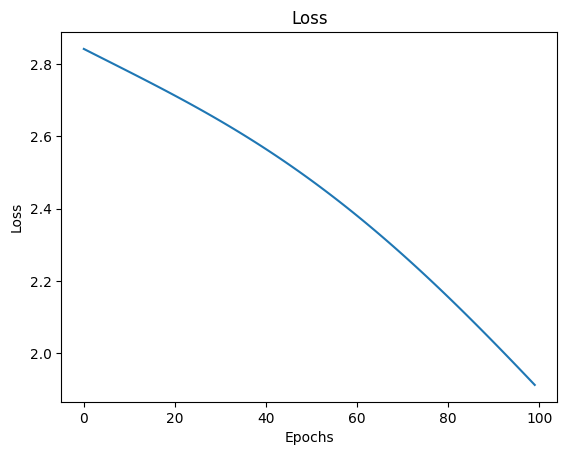

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')